## Hodrick-Prescott Filter

In [ ]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/wangjinyan/Desktop/Python_Time Series Dataset/Data/macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df.head(2)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74


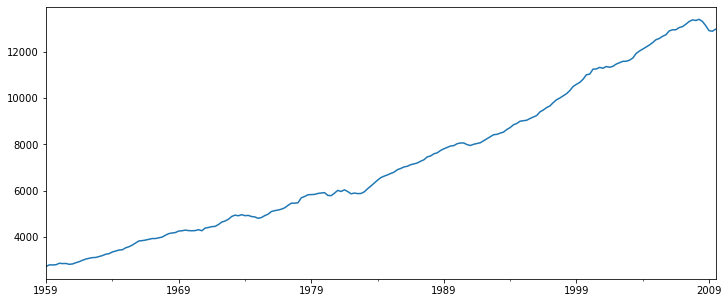

In [5]:
df['realgdp'].plot(figsize=(12,5));

In [ ]:
# HP - Filter Trend and Cyclical Component

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
# how to choose lambda?
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [8]:
# the components are series
type(gdp_cycle)

pandas.core.series.Series

<AxesSubplot:>

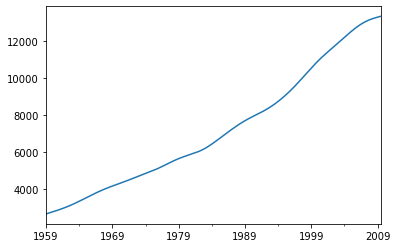

In [9]:
gdp_trend.plot()

In [10]:
df['trend'] = gdp_trend

<AxesSubplot:>

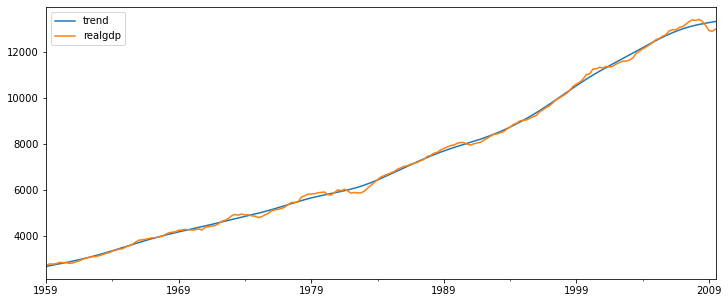

In [14]:
# plot two lines
df[['trend','realgdp']].plot(figsize=(12,5))

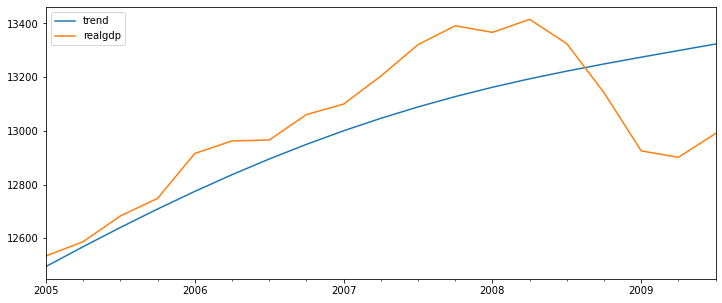

In [16]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5));

## ETS Decomposition

In [17]:
# ETS Models 
# -> exponential smoothing / trend methods / ETS Decomposition

In [ ]:
# ETS Decomposition
## 1. return original data
## 2. return trend component
## 3. return seasonal component
## 4. return error term

In [ ]:
# Additive Model: when the trend seems linear
# multiplicative: change at a non-linear rate

In [37]:
airline = pd.read_csv('/Users/wangjinyan/Desktop/Python_Time Series Dataset/Data/airline_passengers.csv',index_col='Month', parse_dates=True)

In [38]:
airline.head(2)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118


In [39]:
airline = airline.dropna()

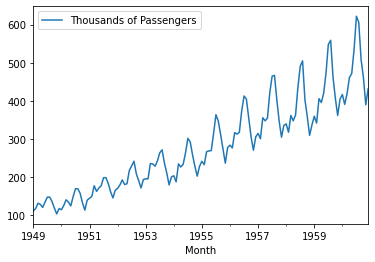

In [40]:
airline.plot();

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

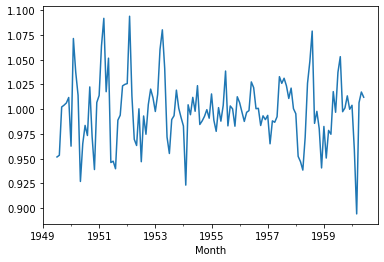

In [44]:
result.resid.plot();

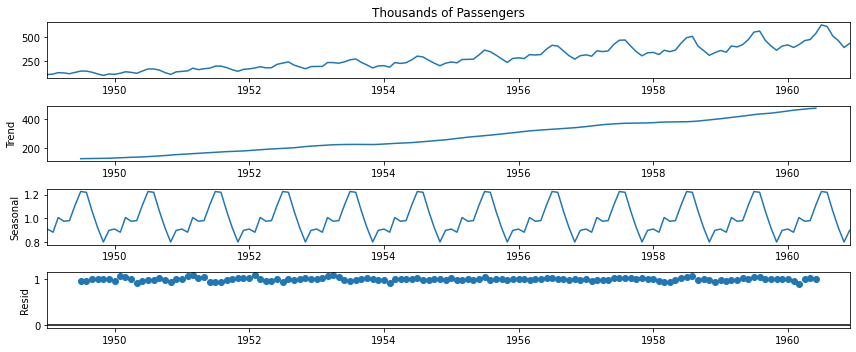

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

## EWMA Models

In [47]:
# more recent data are weighted more than the latest data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
airline = pd.read_csv('/Users/wangjinyan/Desktop/Python_Time Series Dataset/Data/airline_passengers.csv',index_col='Month', parse_dates=True)

In [52]:
airline.dropna(inplace=True)

In [53]:
## airline.index = pd.to_datetime(airline.index)

### Simple Moving Average

In [55]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 6).mean()

In [56]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window = 12).mean()

<AxesSubplot:xlabel='Month'>

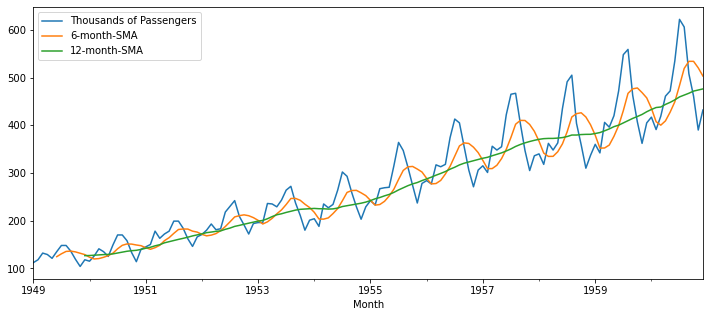

In [58]:
airline.plot(figsize=(12,5))

### Exponential Moving Average

In [59]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

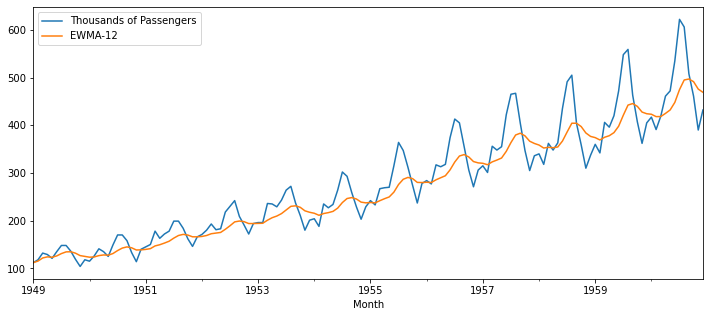

In [61]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,5))

In [ ]:
# Decide decaying parameters
## 1. Span: N-day EW moving average
## 2. center of mass -> c = (span-1)/2
## 3. half-life is the period of time for the exponential weight to reduce to one half